In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io
from astropy.io import fits
import pandas as pd
from astropy import wcs
from astropy.coordinates import SkyCoord
import pickle
import math
from scipy.optimize import curve_fit
from tqdm import tqdm
from astropy import units as u
from astropy.coordinates import (SkyCoord, Distance, Galactic, 
                                 EarthLocation, AltAz)
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
path = 'closest_spine.fits'
cube = fits.open(path)
closest_spine_data = cube[0].data
header = cube[0].header
#print(header)

wcs_close_spine = wcs.WCS(header)

print(wcs_close_spine)
print(closest_spine_data.shape)

WCS Keywords

Number of WCS axes: 3
CTYPE : 'GLON-SFL' 'GLAT-SFL' 'v' 
CRVAL : np.float64(170.233333333) np.float64(0.0) np.float64(4.1100502434622) 
CRPIX : np.float64(1100.0) np.float64(9785.0) np.float64(0.0) 
PC1_1 PC1_2 PC1_3  : np.float64(1.0) np.float64(0.0) np.float64(0.0) 
PC2_1 PC2_2 PC2_3  : np.float64(0.0) np.float64(1.0) np.float64(0.0) 
PC3_1 PC3_2 PC3_3  : np.float64(0.0) np.float64(0.0) np.float64(1.0) 
CDELT : np.float64(-0.001666666707) np.float64(0.001666666707) np.float64(0.020100486924401) 
NAXIS : 2200  800
(800, 2200)


In [5]:
list_ = open("Seo_NH3_peaks.txt").read().split()
strings = list_[4:]
ra_strings = []
dec_strings = []
for i in range(39):
    ra_strings.append(strings[i*3])
    dec_strings.append(strings[i*3+1])

ra = []
dec = []
for i in range(39):
    ra_val = ra_strings[i]
    ra_value = float(ra_val[0])*15 + 15*float(ra_val[2:4])/60 + 15*float(ra_val[5:11])/3600
    ra.append(ra_value)

    dec_val = dec_strings[i]
    dec_value = float(dec_val[0:2]) + float(dec_val[3:5])/60 + float(dec_val[6:11])/3600
    dec.append(dec_value)

c = SkyCoord(ra, dec, frame='icrs', unit='deg')
galactic_coords = c.galactic

lon = np.array(galactic_coords.l*u.degree)
lat = np.array(galactic_coords.b*u.degree)

c = SkyCoord(lon, lat, frame='galactic', unit='deg')

pixels_x, pixels_y = astropy.wcs.utils.skycoord_to_pixel(c, wcs = wcs_close_spine, origin=1)
pixels_x_vel, pixels_y_vel = astropy.wcs.utils.skycoord_to_pixel(c, wcs = wcs_subregion, origin=1)

/tmp/ipykernel_852930/3020178840.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(['1', ' ', '2', ' ', '3', ' ', '4'])


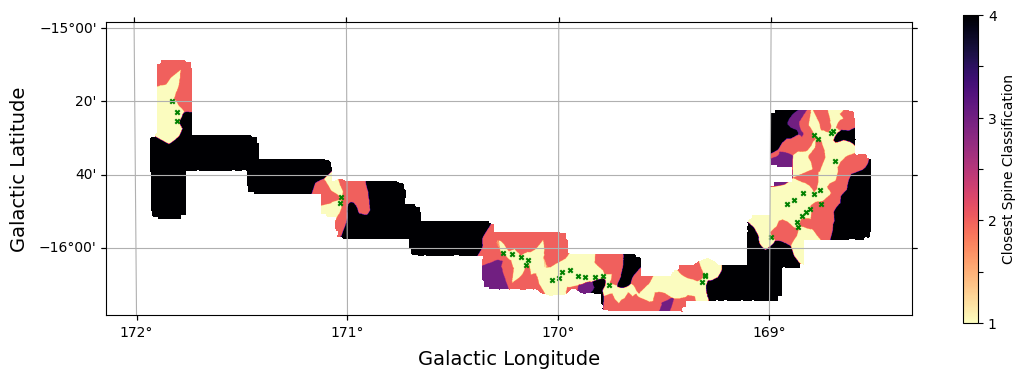

In [6]:
plt.figure(figsize = [13,4])
ax1 = plt.subplot(projection = wcs_close_spine, slices = ('x', 'y', 0))
dist = ax1.imshow(closest_spine_data, origin = 'lower', cmap = 'magma_r')
ax1.scatter(pixels_x, pixels_y, s = 10, color = 'green', marker = 'x')
cbar = plt.colorbar(dist, label = 'Closest Spine Classification')
cbar.ax.set_yticklabels(['1', ' ', '2', ' ', '3', ' ', '4'])
plt.xlabel('Galactic Longitude', fontsize = 14)
plt.ylabel('Galactic Latitude', fontsize = 14)
plt.grid()

In [7]:
path = 'velocity_grid.fits'
vel_cube = fits.open(path)
vel_data = vel_cube[0].data
vel_header = vel_cube[0].header
#print(header)

wcs_vel = wcs.WCS(vel_header)

path = 'distance_transform.fits'
cube = fits.open(path)
distance_transform_data = cube[0].data
header = cube[0].header

wcs_dist_transform = wcs.WCS(header)

path = 'masked_ML_velocity.fits'
cube = fits.open(path)
masked_vel_data = cube[0].data
header = cube[0].header

wcs_masked_vel = wcs.WCS(header)

In [4]:
region = 'B213'
path = region + '_velocity_posterior.fits'
cube = fits.open(path)
data = cube[0].data
header = cube[0].header

wcs_subregion = wcs.WCS(header)
print(wcs_subregion)
print(data.shape)

WCS Keywords

Number of WCS axes: 3
CTYPE : 'GLON-SFL' 'GLAT-SFL' 'v' 
CRVAL : np.float64(170.233333333) np.float64(0.0) np.float64(4.1100502434622) 
CRPIX : np.float64(47.0) np.float64(9715.0) np.float64(0.0) 
PC1_1 PC1_2 PC1_3  : np.float64(1.0) np.float64(0.0) np.float64(0.0) 
PC2_1 PC2_2 PC2_3  : np.float64(0.0) np.float64(1.0) np.float64(0.0) 
PC3_1 PC3_2 PC3_3  : np.float64(0.0) np.float64(0.0) np.float64(1.0) 
CDELT : np.float64(-0.001666666707) np.float64(0.001666666707) np.float64(0.020100486924401) 
NAXIS : 343  127  199
(199, 127, 343)


170.3131659755382 169.7184408938772
-16.190000391798 -15.978333720009001
1053.0000000000043 1395.9999999999973
70.0 197.0


/tmp/ipykernel_852930/3917383915.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(['1', ' ', '2', ' ', '3', ' ', '4'])


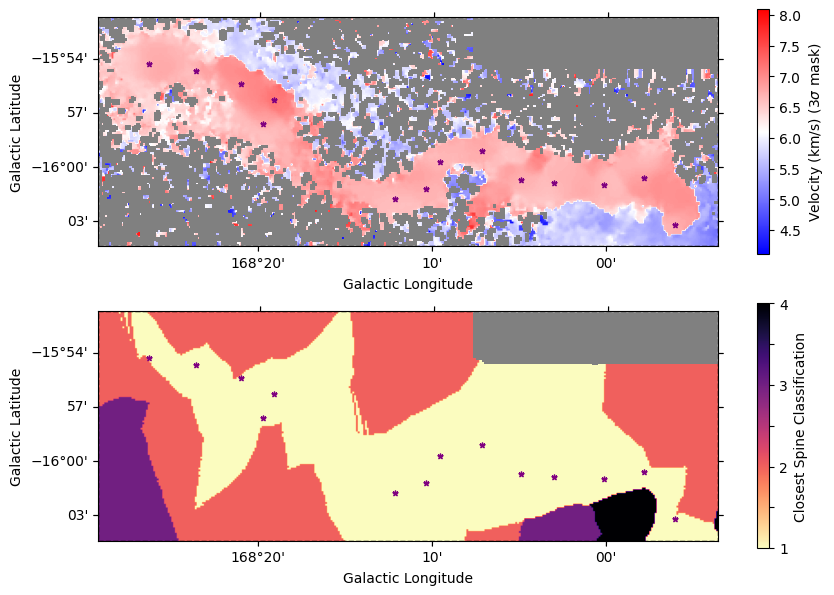

In [8]:
longitude = [135, #B7
            249, #B216
            173, #B218
            343, #B213
            353, #B211
            169 #B10
            ]
latitude = [169, #B7
           169, #B216
           163, #B218
           127, #B213
           133, #B211
           178 #B10
           ]

if region == 'B7':
    index = 0
elif region == 'B216':
    index = 1
elif region == 'B218':
    index = 2
elif region == 'B213':
    index = 3
elif region == 'B211':
    index = 4
elif region == 'B10':
    index = 5

(l_min, b_min, vel), (l_max, b_max, vel) = wcs_subregion.wcs_pix2world([[0, 0, 0], [longitude[index], latitude[index], 0]], 0)

print(l_min, l_max)
print(b_min, b_max)

(l_min_pix, b_min_pix, vel), (l_max_pix, b_max_pix, vel) = wcs_vel.wcs_world2pix([[l_min, b_min, vel], [l_max, b_max, vel]], 0)

print(l_min_pix, l_max_pix)
print(b_min_pix, b_max_pix)

plt.figure(figsize = [10, 7])
ax_1 = plt.subplot(211, projection = wcs_subregion, slices=('x', 'y', 0))
im = ax_1.imshow(masked_vel_data, cmap = 'bwr')
plt.scatter(pixels_x, pixels_y, s = 15, c = 'purple', marker = '*')
ax_1.set_facecolor("grey")
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
ax_1.set(xlim=(round(l_min_pix), round(l_max_pix)), ylim=(round(b_min_pix), round(b_max_pix)))
cbar = plt.colorbar(im, label = r'Velocity (km/s) (3$\sigma$ mask)')
#ax_1.text(1360, 180, 'B213', fontsize = 16, fontweight = 'bold')
ax_1.add_patch(plt.Rectangle((round(l_min_pix) + 0, round(b_min_pix) + 0), longitude[index], latitude[index], ls="--", ec="k", fc="none"))

ax_2 = plt.subplot(212, projection = wcs_subregion, slices=('x', 'y', 0))
im = ax_2.imshow(closest_spine_data, cmap = 'magma_r')
plt.scatter(pixels_x, pixels_y, s = 15, c = 'purple', marker = '*')
ax_2.set_facecolor("grey")
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
ax_2.set(xlim=(round(l_min_pix), round(l_max_pix)), ylim=(round(b_min_pix), round(b_max_pix)))
cbar = plt.colorbar(im, label = r'Closest Spine Classification')
cbar.ax.set_yticklabels(['1', ' ', '2', ' ', '3', ' ', '4'])
#ax_1.text(1360, 180, 'B213', fontsize = 16, fontweight = 'bold')
ax_2.add_patch(plt.Rectangle((round(l_min_pix) + 0, round(b_min_pix) + 0), longitude[index], latitude[index], ls="--", ec="k", fc="none"))

343 343
127 127
343 343
127 127
<function divergence at 0x79206bea5620>


/tmp/ipykernel_852930/3375470504.py:27: RuntimeWarning: invalid value encountered in scalar divide
  x_place.append(float(-grad_x_spines[i][j]/(np.sqrt(grad_y_spines[i][j]**2 + grad_x_spines[i][j]**2))))
/tmp/ipykernel_852930/3375470504.py:28: RuntimeWarning: invalid value encountered in scalar divide
  y_place.append(float(-grad_y_spines[i][j]/(np.sqrt(grad_y_spines[i][j]**2 + grad_x_spines[i][j]**2))))
/tmp/ipykernel_852930/3375470504.py:51: RuntimeWarning: invalid value encountered in scalar divide
  proj_length = (perp_x_spines[i][j] * grad_x_vel[i][j] + perp_y_spines[i][j] * grad_y_vel[i][j])/(np.sqrt((perp_x_spines[i][j])**2 + (perp_y_spines[i][j])**2))
/tmp/ipykernel_852930/3375470504.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(['1', ' ', '2', ' ', '3', ' ', '4'])


[(0.0, 342.5), (0.0, 126.5)]

/home/ljsteffes/.venv/lib/python3.12/site-packages/matplotlib/quiver.py:632: RuntimeWarning: Mean of empty slice.
  amean = a.mean()
/home/ljsteffes/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


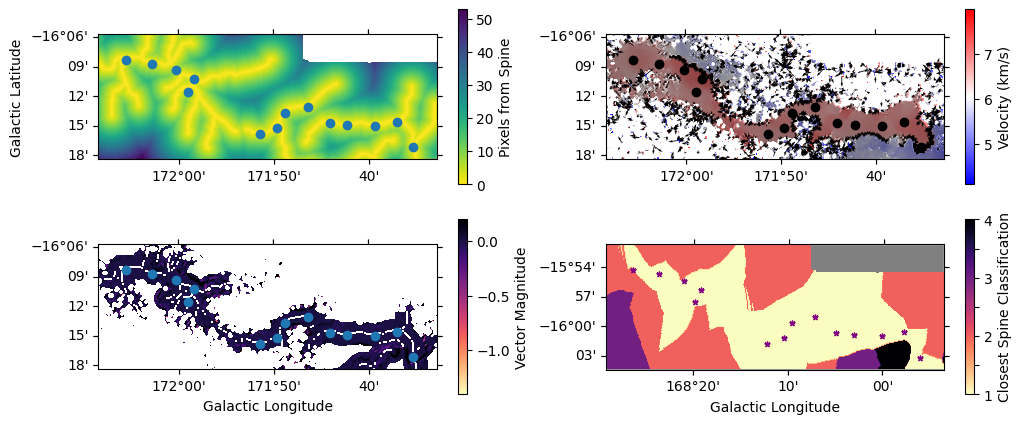

In [13]:
def divergence(scalar_field):
    gy, gx = np.gradient(scalar_field)
    print(len(gx[0]), len(gy[0]))
    return(gy, gx)

lon_length, lat_length = longitude[index], latitude[index]
lon_start, lat_start = 0, 0

subregion_vel = masked_vel_data[round(b_min_pix + lat_start):round(b_min_pix + lat_start + lat_length), round(l_min_pix + lon_start):round(l_min_pix + lon_start + lon_length)]
grad_y_vel, grad_x_vel = divergence(subregion_vel) #Flip the order because the coordinates get put in (b, l) and not (l, b)
print(len(grad_x_vel), len(grad_y_vel))

subregion_spines = distance_transform_data[round(b_min_pix + lat_start):round(b_min_pix + lat_start + lat_length), round(l_min_pix + lon_start):round(l_min_pix + lon_start + lon_length)]
grad_y_spines, grad_x_spines = divergence(subregion_spines) #Flip the order because the coordinates get put in (b, l) and not (l, b)
print(len(grad_x_spines), len(grad_y_spines))

subregion_closest_spines = closest_spine_data[round(b_min_pix + lat_start):round(b_min_pix + lat_start + lat_length), round(l_min_pix + lon_start):round(l_min_pix + lon_start + lon_length)]

perp_x_spines = []
perp_y_spines = []
diff_1_form_mag = []
for i in range(lat_length):
    x_place = []
    y_place = []
    for j in range(lon_length):
        if subregion_spines[i][j] <= 12:
            x_place.append(float(-grad_x_spines[i][j]/(np.sqrt(grad_y_spines[i][j]**2 + grad_x_spines[i][j]**2))))
            y_place.append(float(-grad_y_spines[i][j]/(np.sqrt(grad_y_spines[i][j]**2 + grad_x_spines[i][j]**2))))
            diff_1_form_mag.append(np.sqrt(grad_y_spines[i][j]**2 + grad_x_spines[i][j]**2))
        else:
            x_place.append(float(0))
            y_place.append(float(0))
    perp_x_spines.append(np.array(x_place))
    perp_y_spines.append(np.array(y_place))

x = np.arange(0, lon_length, 1)
y = np.arange(0, lat_length, 1)

X, Y = np.meshgrid(x,y)

perp_grad_x = []
perp_grad_y = []
x_vals = []
y_vals = []
perpendicular_divergence = []
for i in range(len(y)):
    #x_values = []
    #y_values = []
    summed = []
    for j in range(len(x)):
        proj_length = (perp_x_spines[i][j] * grad_x_vel[i][j] + perp_y_spines[i][j] * grad_y_vel[i][j])/(np.sqrt((perp_x_spines[i][j])**2 + (perp_y_spines[i][j])**2))
        
        #summed.append(np.sqrt((-grad_x_spines[i][j] * proj_length)**2 + (-grad_y_spines[i][j] * proj_length)**2))
        summed.append(proj_length)

    perpendicular_divergence.append(summed)

print(np.nanmax(divergence))

plt.figure(figsize = [12, 5])

ax_4 = plt.subplot(224, projection = wcs_subregion, slices=('x', 'y', 0))
im = ax_4.imshow(closest_spine_data, cmap = 'magma_r')
plt.scatter(pixels_x, pixels_y, s = 15, c = 'purple', marker = '*')
ax_4.set_facecolor("grey")
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude', c = 'white')
ax_4.set(xlim=(round(l_min_pix), round(l_max_pix)), ylim=(round(b_min_pix), round(b_max_pix)))
cbar = plt.colorbar(im, label = r'Closest Spine Classification')
cbar.ax.set_yticklabels(['1', ' ', '2', ' ', '3', ' ', '4'])

ax_3 = plt.subplot(223, projection = wcs_vel, slices=('x', 'y', 0))
im = ax_3.imshow(perpendicular_divergence, cmap = 'magma_r', vmax = 0.2)
#im = ax_1.imshow(perp_divergence, cmap = 'magma')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude', c = 'white')
ax_3.scatter(pixels_x_vel-lon_start, pixels_y_vel-lat_start)
ax_3.set(xlim=(0, longitude[index] - 0.5), ylim=(0, latitude[index] - 0.5))
#plt.quiver(x, y, grad_x_vel, grad_y_vel, color = 'black')
cbar = plt.colorbar(im, label = 'Vector Magnitude')

ax_2 = plt.subplot(222, projection = wcs_vel, slices=('x', 'y', 0))
im = ax_2.imshow(subregion_vel, cmap = 'bwr', vmin = np.nanmin(subregion_vel), vmax = np.nanmax(subregion_vel))
#im = ax_2.imshow(perp_divergence, cmap = 'magma')
plt.xlabel('Galactic Longitude', c = 'white')
plt.ylabel('Galactic Latitude', c = 'white')
ax_2.scatter(pixels_x_vel-lon_start, pixels_y_vel-lat_start, color = 'black')
ax_2.set(xlim=(0, longitude[index] - 0.5), ylim=(0, latitude[index] - 0.5))
plt.quiver(x, y, grad_x_vel, grad_y_vel, color = 'black')
cbar = plt.colorbar(im, label = 'Velocity (km/s)')

ax_1 = plt.subplot(221, projection = wcs_vel, slices=('x', 'y', 0))
im = ax_1.imshow(subregion_spines, cmap = 'viridis_r', vmax = np.nanmax(subregion_spines))
plt.quiver(x_vals, y_vals, perp_grad_x, perp_grad_y, color = 'black')
#plt.quiver(x, y, -grad_x_spines, -grad_y_spines, color = 'black')
plt.xlabel('Galactic Longitude', c = 'white')
plt.ylabel('Galactic Latitude')
cbar = plt.colorbar(im, label = 'Pixels from Spine')
#ax_1.add_patch(plt.Circle((109, 129), 1))
ax_1.scatter(pixels_x_vel-lon_start, pixels_y_vel-lat_start)
ax_1.set(xlim=(0, longitude[index] - 0.5), ylim=(0, latitude[index] - 0.5))

3015 2842 2139 1295
1573 1191 868 527


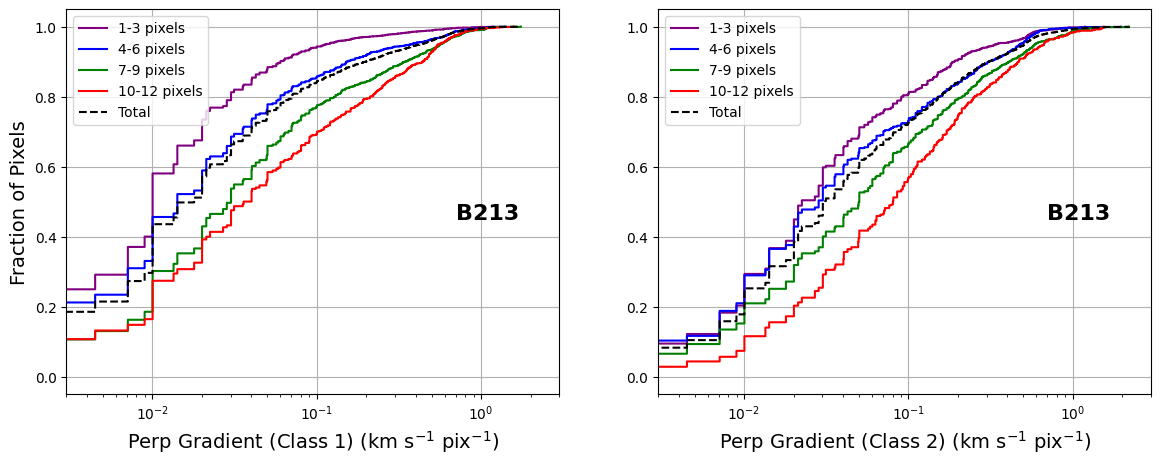

In [14]:
vec_mag_low_1_perp = []
vec_mag_med_1_perp = []
vec_mag_high_1_perp = []
vec_mag_higher_1_perp = []
total_vec_mag_1_perp = []

vec_mag_low_2_perp = []
vec_mag_med_2_perp = []
vec_mag_high_2_perp = []
vec_mag_higher_2_perp = []
total_vec_mag_2_perp = []

for i in range(lon_length):
    for j in range(lat_length):
        if 1 <= subregion_spines[j][i] <= 3:
            if subregion_closest_spines[j][i] == 1 and math.isnan(perpendicular_divergence[j][i]) == False:
                vec_mag_low_1_perp.append(np.abs(perpendicular_divergence[j][i]))
                total_vec_mag_1_perp.append(np.abs(perpendicular_divergence[j][i]))
            elif subregion_closest_spines[j][i] == 2 and math.isnan(perpendicular_divergence[j][i]) == False:
                vec_mag_low_2_perp.append(np.abs(perpendicular_divergence[j][i]))
                total_vec_mag_2_perp.append(np.abs(perpendicular_divergence[j][i]))
        elif 4 <= subregion_spines[j][i] <= 6:
            if subregion_closest_spines[j][i] == 1 and math.isnan(perpendicular_divergence[j][i]) == False:
                vec_mag_med_1_perp.append(np.abs(perpendicular_divergence[j][i]))
                total_vec_mag_1_perp.append(np.abs(perpendicular_divergence[j][i]))
            elif subregion_closest_spines[j][i] == 2 and math.isnan(perpendicular_divergence[j][i]) == False:
                vec_mag_med_2_perp.append(np.abs(perpendicular_divergence[j][i]))
                total_vec_mag_2_perp.append(np.abs(perpendicular_divergence[j][i]))
        elif 7 <= subregion_spines[j][i] <= 9:
            if subregion_closest_spines[j][i] == 1 and math.isnan(perpendicular_divergence[j][i]) == False:
                vec_mag_high_1_perp.append(np.abs(perpendicular_divergence[j][i]))
                total_vec_mag_1_perp.append(np.abs(perpendicular_divergence[j][i]))
            elif subregion_closest_spines[j][i] == 2 and math.isnan(perpendicular_divergence[j][i]) == False:
                vec_mag_high_2_perp.append(np.abs(perpendicular_divergence[j][i]))
                total_vec_mag_2_perp.append(np.abs(perpendicular_divergence[j][i]))
        elif 10 <= subregion_spines[j][i] <= 12:
            if subregion_closest_spines[j][i] == 1 and math.isnan(perpendicular_divergence[j][i]) == False:
                vec_mag_higher_1_perp.append(np.abs(perpendicular_divergence[j][i]))
                total_vec_mag_1_perp.append(np.abs(perpendicular_divergence[j][i]))
            elif subregion_closest_spines[j][i] == 2 and math.isnan(perpendicular_divergence[j][i]) == False:
                vec_mag_higher_2_perp.append(np.abs(perpendicular_divergence[j][i]))
                total_vec_mag_2_perp.append(np.abs(perpendicular_divergence[j][i]))

plt.figure(figsize = [14, 5])
ax1 = plt.subplot(121)
ax1.ecdf(vec_mag_low_1_perp, label = '1-3 pixels', color = 'purple')
ax1.ecdf(vec_mag_med_1_perp, label = '4-6 pixels', color = 'blue')
ax1.ecdf(vec_mag_high_1_perp, label = '7-9 pixels', color = 'green')
ax1.ecdf(vec_mag_higher_1_perp, label = '10-12 pixels', color = 'red')
ax1.ecdf(total_vec_mag_1_perp, label = 'Total', linestyle = 'dashed', color = 'black')

print(len(vec_mag_low_1_perp), len(vec_mag_med_1_perp), len(vec_mag_high_1_perp), len(vec_mag_higher_1_perp))

plt.xscale('log')
plt.xlim(3E-3, 3)
plt.ylim(-0.05, 1.05)
plt.text(0.7, 0.45, region, fontsize = 16, fontweight = 'bold')

plt.legend(loc = 'upper left')
plt.xlabel(r'Perp Gradient (Class 1) (km s$^{-1}$ pix$^{-1}$)', fontsize = 14)
plt.ylabel('Fraction of Pixels', fontsize = 14)
plt.grid()

ax2 = plt.subplot(122)
ax2.ecdf(vec_mag_low_2_perp, label = '1-3 pixels', color = 'purple')
ax2.ecdf(vec_mag_med_2_perp, label = '4-6 pixels', color = 'blue')
ax2.ecdf(vec_mag_high_2_perp, label = '7-9 pixels', color = 'green')
ax2.ecdf(vec_mag_higher_2_perp, label = '10-12 pixels', color = 'red')
ax2.ecdf(total_vec_mag_2_perp, label = 'Total', linestyle = 'dashed', color = 'black')

print(len(vec_mag_low_2_perp), len(vec_mag_med_2_perp), len(vec_mag_high_2_perp), len(vec_mag_higher_2_perp))

plt.xscale('log')
plt.xlim(3E-3, 3)
plt.ylim(-0.05, 1.05)
plt.text(0.7, 0.45, region, fontsize = 16, fontweight = 'bold')

plt.legend(loc = 'upper left')
plt.xlabel(r'Perp Gradient (Class 2) (km s$^{-1}$ pix$^{-1}$)', fontsize = 14)
#plt.ylabel('Fraction of Pixels', fontsize = 14)
plt.grid()
#plt.savefig('Figures/B213_cdf_perp.png', transparent=True, bbox_inches = 'tight')

343 343
127 127
343 343
127 127


/tmp/ipykernel_852930/1824331898.py:42: RuntimeWarning: invalid value encountered in scalar divide
  x_place.append(float(-grad_y_spines[i][j]/(np.sqrt(grad_y_spines[i][j]**2 + grad_x_spines[i][j]**2))))
/tmp/ipykernel_852930/1824331898.py:43: RuntimeWarning: invalid value encountered in scalar divide
  y_place.append(float(grad_x_spines[i][j]/(np.sqrt(grad_y_spines[i][j]**2 + grad_x_spines[i][j]**2))))
/tmp/ipykernel_852930/1824331898.py:56: RuntimeWarning: invalid value encountered in scalar divide
  proj_length = (par_x_spines[i][j] * grad_x_vel[i][j] + par_y_spines[i][j] * grad_y_vel[i][j])/np.sqrt((par_x_spines[i][j])**2 +
/tmp/ipykernel_852930/1824331898.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(['1', ' ', '2', ' ', '3', ' ', '4'])


[(0.0, 342.5), (0.0, 126.5)]

/home/ljsteffes/.venv/lib/python3.12/site-packages/matplotlib/quiver.py:632: RuntimeWarning: Mean of empty slice.
  amean = a.mean()
/home/ljsteffes/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


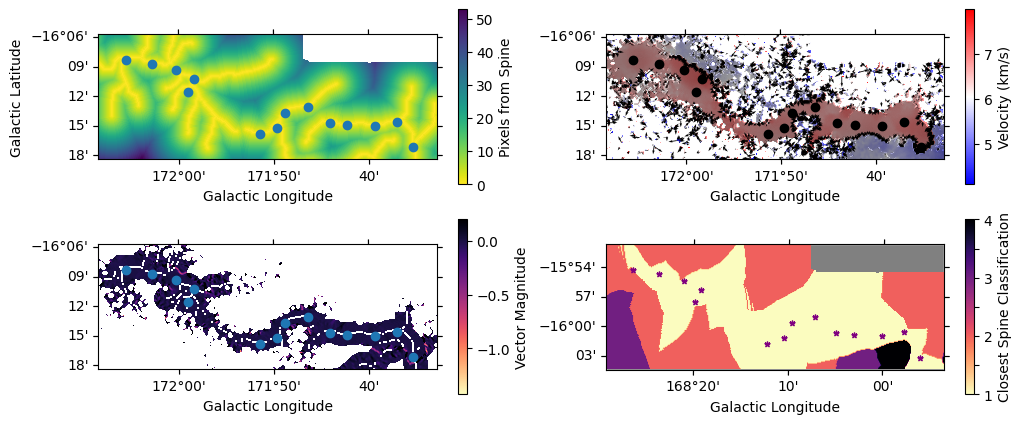

In [15]:
def divergence(scalar_field):
    gy, gx = np.gradient(scalar_field)
    print(len(gx[0]), len(gy[0]))
    return(gy, gx)

lon_length, lat_length = longitude[index], latitude[index]
lon_start, lat_start = 0, 0

subregion_vel = masked_vel_data[round(b_min_pix + lat_start):round(b_min_pix + lat_start + lat_length), round(l_min_pix + lon_start):round(l_min_pix + lon_start + lon_length)]
grad_y_vel, grad_x_vel = divergence(subregion_vel) #Flip the order because the coordinates get put in (b, l) and not (l, b)
print(len(grad_x_vel), len(grad_y_vel))

subregion_spines = distance_transform_data[round(b_min_pix + lat_start):round(b_min_pix + lat_start + lat_length), round(l_min_pix + lon_start):round(l_min_pix + lon_start + lon_length)]
grad_y_spines, grad_x_spines = divergence(subregion_spines) #Flip the order because the coordinates get put in (b, l) and not (l, b)
print(len(grad_x_spines), len(grad_y_spines))

subregion_closest_spines = closest_spine_data[round(b_min_pix + lat_start):round(b_min_pix + lat_start + lat_length), round(l_min_pix + lon_start):round(l_min_pix + lon_start + lon_length)]

x = np.arange(0, lon_length, 1)
y = np.arange(0, lat_length, 1)

X, Y = np.meshgrid(x,y)

x_0 = []
y_0 = []
for i in range(lat_length):
    for j in range(lon_length):
        if subregion_spines[i][j] == 0:
            x_0.append(j)
            y_0.append(i)
            #print(i, j, grad_x_spines[i][j], grad_y_spines[i][j])

par_x_spines = []
par_y_spines = []
for i in range(lat_length):
    x_place = []
    y_place = []
    for j in range(lon_length):
        #print(j, i, list(x_0).index(j), y_0[list(x_0).index(j)]) 
        #print x coord, y coord, the index of the spine in that column, the y coordinate of the spine in that column
        if subregion_spines[i][j] <= 12:
            x_place.append(float(-grad_y_spines[i][j]/(np.sqrt(grad_y_spines[i][j]**2 + grad_x_spines[i][j]**2))))
            y_place.append(float(grad_x_spines[i][j]/(np.sqrt(grad_y_spines[i][j]**2 + grad_x_spines[i][j]**2))))
        else:
            x_place.append(float(0))
            y_place.append(float(0))
    par_x_spines.append(np.array(x_place))
    par_y_spines.append(np.array(y_place))

para_grad_x = []
para_grad_y = []
parallel_divergence = []
for i in range(len(y)):
    summed = []
    for j in range(len(x)):
        proj_length = (par_x_spines[i][j] * grad_x_vel[i][j] + par_y_spines[i][j] * grad_y_vel[i][j])/np.sqrt((par_x_spines[i][j])**2 + 
                                                                                                       (par_y_spines[i][j])**2)
        summed.append(proj_length)
        
    parallel_divergence.append(summed)

plt.figure(figsize = [12, 5])

ax_4 = plt.subplot(224, projection = wcs_subregion, slices=('x', 'y', 0))
im = ax_4.imshow(closest_spine_data, cmap = 'magma_r')
plt.scatter(pixels_x, pixels_y, s = 15, c = 'purple', marker = '*')
ax_4.set_facecolor("grey")
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude', c = 'white')
ax_4.set(xlim=(round(l_min_pix), round(l_max_pix)), ylim=(round(b_min_pix), round(b_max_pix)))
cbar = plt.colorbar(im, label = r'Closest Spine Classification')
cbar.ax.set_yticklabels(['1', ' ', '2', ' ', '3', ' ', '4'])

ax_3 = plt.subplot(223, projection = wcs_vel, slices=('x', 'y', 0))
im = ax_3.imshow(parallel_divergence, cmap = 'magma_r', vmax = 0.2)
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude', c = 'white')
ax_3.scatter(pixels_x_vel-lon_start, pixels_y_vel-lat_start)
ax_3.set(xlim=(0, longitude[index] - 0.5), ylim=(0, latitude[index] - 0.5))
cbar = plt.colorbar(im, label = 'Vector Magnitude')

ax_2 = plt.subplot(222, projection = wcs_vel, slices=('x', 'y', 0))
im = ax_2.imshow(subregion_vel, cmap = 'bwr', vmin = np.nanmin(subregion_vel), vmax = np.nanmax(subregion_vel))
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude', c = 'white')
ax_2.scatter(pixels_x_vel-lon_start, pixels_y_vel-lat_start, color = 'black')
ax_2.set(xlim=(0, longitude[index] - 0.5), ylim=(0, latitude[index] - 0.5))
plt.quiver(X, Y, grad_x_vel, grad_y_vel, color = 'black')
cbar = plt.colorbar(im, label = 'Velocity (km/s)')

ax_1 = plt.subplot(221, projection = wcs_vel, slices=('x', 'y', 0))
im = ax_1.imshow(subregion_spines, cmap = 'viridis_r', vmax = np.nanmax(subregion_spines))
#plt.quiver(x_vals, y_vals, grad_x_spines, grad_y_spines, color = 'black')
plt.quiver(x_vals, y_vals, para_grad_x, para_grad_y, color = 'black')
#plt.quiver(X, Y, par_x_spines, par_y_spines, color = 'black')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
cbar = plt.colorbar(im, label = 'Pixels from Spine')
ax_1.scatter(pixels_x_vel-lon_start, pixels_y_vel-lat_start)
#print(pixels_x_vel-lon_start, pixels_y_vel-lat_start)
ax_1.set(xlim=(0, longitude[index] - 0.5), ylim=(0, latitude[index] - 0.5))
#ax_1.text(2, 2, 'Parallel 0-Form', size = 12, color = 'white', fontweight = 'bold')

3015 2842 2139 1295
1573 1191 868 527


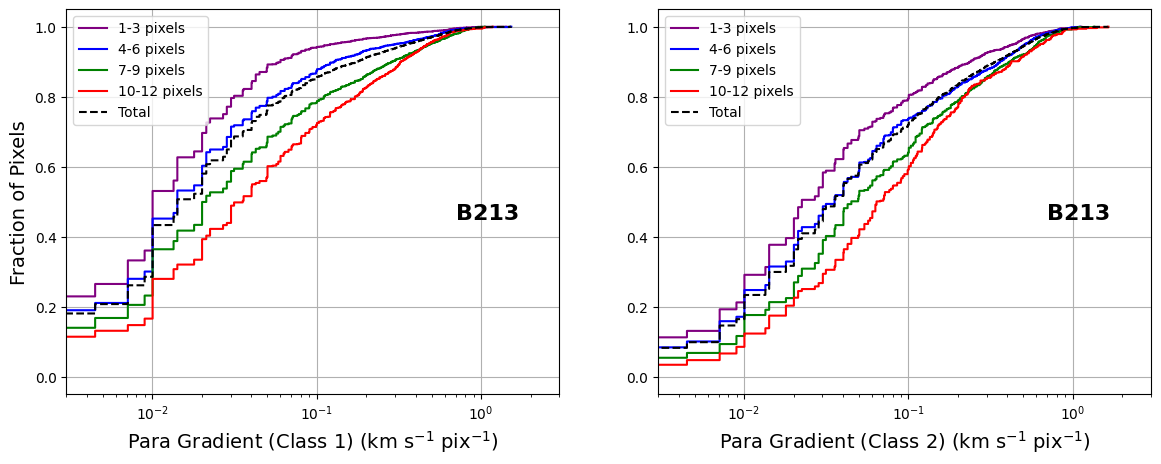

In [18]:
vec_mag_low_1_para = []
vec_mag_med_1_para = []
vec_mag_high_1_para = []
vec_mag_higher_1_para = []
total_vec_mag_1_para = []

vec_mag_low_2_para = []
vec_mag_med_2_para = []
vec_mag_high_2_para = []
vec_mag_higher_2_para = []
total_vec_mag_2_para = []

for i in range(lon_length):
    for j in range(lat_length):
        if 1 <= subregion_spines[j][i] <= 3:
            if subregion_closest_spines[j][i] == 1 and math.isnan(parallel_divergence[j][i]) == False:
                vec_mag_low_1_para.append(np.abs(parallel_divergence[j][i]))
                total_vec_mag_1_para.append(np.abs(parallel_divergence[j][i]))
            elif subregion_closest_spines[j][i] == 2 and math.isnan(parallel_divergence[j][i]) == False:
                vec_mag_low_2_para.append(np.abs(parallel_divergence[j][i]))
                total_vec_mag_2_para.append(np.abs(parallel_divergence[j][i]))
        elif 4 <= subregion_spines[j][i] <= 6:
            if subregion_closest_spines[j][i] == 1 and math.isnan(parallel_divergence[j][i]) == False:
                vec_mag_med_1_para.append(np.abs(parallel_divergence[j][i]))
                total_vec_mag_1_para.append(np.abs(parallel_divergence[j][i]))
            elif subregion_closest_spines[j][i] == 2 and math.isnan(parallel_divergence[j][i]) == False:
                vec_mag_med_2_para.append(np.abs(parallel_divergence[j][i]))
                total_vec_mag_2_para.append(np.abs(parallel_divergence[j][i]))
        elif 7 <= subregion_spines[j][i] <= 9:
            if subregion_closest_spines[j][i] == 1 and math.isnan(parallel_divergence[j][i]) == False:
                vec_mag_high_1_para.append(np.abs(parallel_divergence[j][i]))
                total_vec_mag_1_para.append(np.abs(parallel_divergence[j][i]))
            elif subregion_closest_spines[j][i] == 2 and math.isnan(parallel_divergence[j][i]) == False:
                vec_mag_high_2_para.append(np.abs(parallel_divergence[j][i]))
                total_vec_mag_2_para.append(np.abs(parallel_divergence[j][i]))
        elif 10 <= subregion_spines[j][i] <= 12:
            if subregion_closest_spines[j][i] == 1 and math.isnan(parallel_divergence[j][i]) == False:
                vec_mag_higher_1_para.append(np.abs(parallel_divergence[j][i]))
                total_vec_mag_1_para.append(np.abs(parallel_divergence[j][i]))
            elif subregion_closest_spines[j][i] == 2 and math.isnan(parallel_divergence[j][i]) == False:
                vec_mag_higher_2_para.append(np.abs(parallel_divergence[j][i]))
                total_vec_mag_2_para.append(np.abs(parallel_divergence[j][i]))

plt.figure(figsize = [14, 5])
ax1 = plt.subplot(121)
ax1.ecdf(vec_mag_low_1_para, label = '1-3 pixels', color = 'purple')
ax1.ecdf(vec_mag_med_1_para, label = '4-6 pixels', color = 'blue')
ax1.ecdf(vec_mag_high_1_para, label = '7-9 pixels', color = 'green')
ax1.ecdf(vec_mag_higher_1_para, label = '10-12 pixels', color = 'red')
ax1.ecdf(total_vec_mag_1_para, label = 'Total', linestyle = 'dashed', color = 'black')

print(len(vec_mag_low_1_para), len(vec_mag_med_1_para), len(vec_mag_high_1_para), len(vec_mag_higher_1_para))

plt.xscale('log')
plt.xlim(3E-3, 3)
plt.ylim(-0.05, 1.05)
plt.text(0.7, 0.45, region, fontsize = 16, fontweight = 'bold')

plt.legend(loc = 'upper left')
plt.xlabel(r'Para Gradient (Class 1) (km s$^{-1}$ pix$^{-1}$)', fontsize = 14)
plt.ylabel('Fraction of Pixels', fontsize = 14)
plt.grid()

ax2 = plt.subplot(122)
ax2.ecdf(vec_mag_low_2_para, label = '1-3 pixels', color = 'purple')
ax2.ecdf(vec_mag_med_2_para, label = '4-6 pixels', color = 'blue')
ax2.ecdf(vec_mag_high_2_para, label = '7-9 pixels', color = 'green')
ax2.ecdf(vec_mag_higher_2_para, label = '10-12 pixels', color = 'red')
ax2.ecdf(total_vec_mag_2_para, label = 'Total', linestyle = 'dashed', color = 'black')

print(len(vec_mag_low_2_para), len(vec_mag_med_2_para), len(vec_mag_high_2_para), len(vec_mag_higher_2_para))

plt.xscale('log')
plt.xlim(3E-3, 3)
plt.ylim(-0.05, 1.05)
plt.text(0.7, 0.45, region, fontsize = 16, fontweight = 'bold')

plt.legend(loc = 'upper left')
plt.xlabel(r'Para Gradient (Class 2) (km s$^{-1}$ pix$^{-1}$)', fontsize = 14)
#plt.ylabel('Fraction of Pixels', fontsize = 14)
plt.grid()
#plt.savefig('Figures/B213_cdf_perp.png', transparent=True, bbox_inches = 'tight')